#### Load data from large analysis and get summaries to plot 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

In [2]:
# plot results from Simulation scripts/SBR_simulation.py
loaded_data = load('/u/ruizsuar/InformedML-CV/Environments/ND_Dec2.pkl')# 21
globals().update(loaded_data)

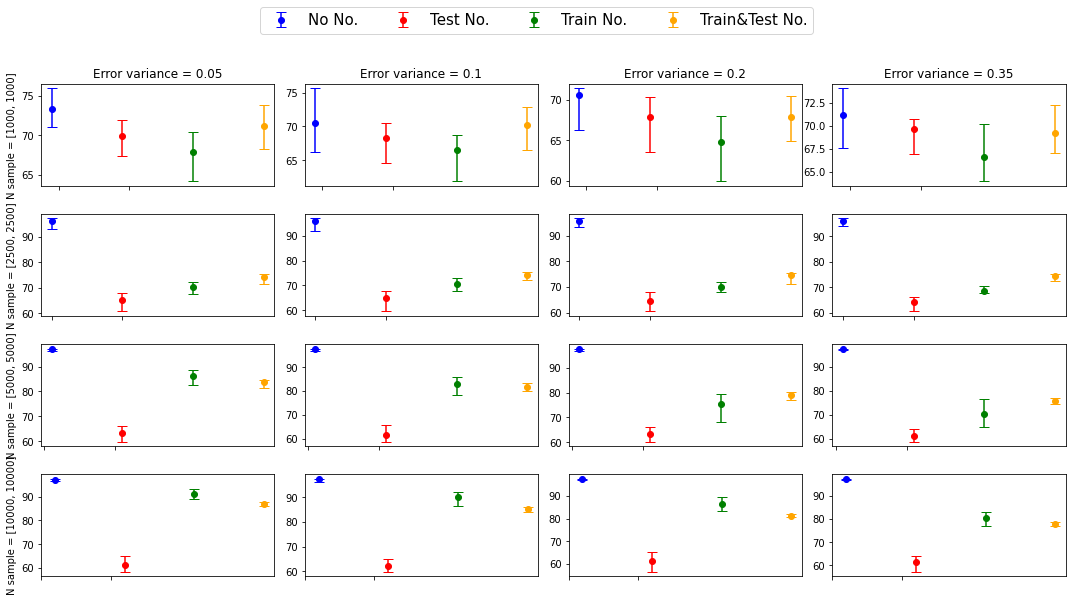

In [15]:
quantiles = [0.2, 0.5, 0.8]  # 10th, 50th, and 90th percentiles

fig, axes = plt.subplots(len(n_samples),len(vars), figsize=(15, 8))
quantiles = [0.2, 0.5, 0.8]  # 10th, 50th, and 90th percentiles
x_offsets = [-0.1, 0.0, 0.1, 0.2]  # Offsets for each plot on the x-axis
colors = np.array(['blue','red','green','orange'])
labels = np.array(['No No.','Test No.','Train No.','Train&Test No.'])

for n,n_sample in enumerate(n_samples):
    for j, var in enumerate(vars):
        for m in range(len(save_results)):
            accuracy_array_e = np.quantile(save_results[m][0], q=quantiles, axis=2)
            lower_errors = accuracy_array_e[1,n,] - accuracy_array_e[0,n,]
            upper_errors = accuracy_array_e[2,n,] - accuracy_array_e[1,n,]

            # Combine the lower and upper errors in a single array
            asymmetric_error = [[lower_errors[j]], [upper_errors[j]]]
            adjusted_x =  np.array([0,1,2,3]) + np.array(x_offsets[n])

            if n==0 and j==0:
                axes[n,j].errorbar(adjusted_x[m], accuracy_array_e[1,n,j], 
                            yerr= asymmetric_error, fmt='o', capsize=5, color= colors[m],
                            label=labels[m])
            else:
                axes[n,j].errorbar(adjusted_x[m], accuracy_array_e[1,n,j], 
                            yerr= asymmetric_error, fmt='o', capsize=5, color= colors[m])
            
            axes[n,j].set_xticks(np.array([0,1]), ['',' '])
            if (n==0):
                    axes[n,j].set(title=f'Error variance = {var}')
            if (j==0):
                axes[n,j].set(ylabel=f'N sample = {n_sample}')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4,fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 0.95])




In [19]:
asymmetric_error[j]

array([5.825, 2.6  ])